# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"] - 273.15
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | provideniya
Processing Record 2 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 1 | yumen
Processing Record 4 of Set 1 | victoria
Processing Record 5 of Set 1 | khatanga
Processing Record 6 of Set 1 | tasiilaq
Processing Record 7 of Set 1 | codrington
Processing Record 8 of Set 1 | castro
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | hithadhoo
Processing Record 13 of Set 1 | toliary
City not found. Skipping...
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | aswan
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | matadi
Processing Record 19 of Set 1 | aklavik
Processing Record 20 of Set 1 | lavrentiya
Processing Record 21 of Set 1 | port alfre

Processing Record 35 of Set 4 | north bend
Processing Record 36 of Set 4 | kaitangata
Processing Record 37 of Set 4 | severo-kurilsk
Processing Record 38 of Set 4 | raquira
Processing Record 39 of Set 4 | saint anthony
Processing Record 40 of Set 4 | elko
Processing Record 41 of Set 4 | kudahuvadhoo
Processing Record 42 of Set 4 | ocnita
Processing Record 43 of Set 4 | gravelbourg
Processing Record 44 of Set 4 | cotonou
Processing Record 45 of Set 4 | pisco
Processing Record 46 of Set 4 | samarai
Processing Record 47 of Set 4 | rognan
Processing Record 48 of Set 4 | marzuq
Processing Record 49 of Set 4 | georgetown
Processing Record 0 of Set 5 | port hardy
Processing Record 1 of Set 5 | harper
Processing Record 2 of Set 5 | college
Processing Record 3 of Set 5 | san carlos de bariloche
Processing Record 4 of Set 5 | bengkulu
Processing Record 5 of Set 5 | rio das pedras
Processing Record 6 of Set 5 | clinton
Processing Record 7 of Set 5 | kushiro
Processing Record 8 of Set 5 | ancud
Pr

Processing Record 27 of Set 8 | tottori
Processing Record 28 of Set 8 | leningradskiy
Processing Record 29 of Set 8 | poum
Processing Record 30 of Set 8 | port macquarie
Processing Record 31 of Set 8 | panjakent
Processing Record 32 of Set 8 | dormidontovka
Processing Record 33 of Set 8 | kasangulu
Processing Record 34 of Set 8 | kasra
City not found. Skipping...
Processing Record 35 of Set 8 | ko samui
Processing Record 36 of Set 8 | siedlce
Processing Record 37 of Set 8 | port blair
Processing Record 38 of Set 8 | salalah
Processing Record 39 of Set 8 | hamilton
Processing Record 40 of Set 8 | balkanabat
Processing Record 41 of Set 8 | visby
Processing Record 42 of Set 8 | mgandu
Processing Record 43 of Set 8 | morondava
Processing Record 44 of Set 8 | sangar
Processing Record 45 of Set 8 | waitati
Processing Record 46 of Set 8 | veraval
Processing Record 47 of Set 8 | sao paulo de olivenca
Processing Record 48 of Set 8 | eberbach
Processing Record 49 of Set 8 | vao
Processing Record

Processing Record 16 of Set 12 | karakendzha
City not found. Skipping...
Processing Record 17 of Set 12 | englewood
Processing Record 18 of Set 12 | nioki
Processing Record 19 of Set 12 | green river
Processing Record 20 of Set 12 | limbang
Processing Record 21 of Set 12 | alofi
Processing Record 22 of Set 12 | marsh harbour
Processing Record 23 of Set 12 | yaan
Processing Record 24 of Set 12 | puerto escondido
Processing Record 25 of Set 12 | stornoway
Processing Record 26 of Set 12 | magadan
Processing Record 27 of Set 12 | bowen
Processing Record 28 of Set 12 | pundaguitan
Processing Record 29 of Set 12 | pampa
Processing Record 30 of Set 12 | coihaique
Processing Record 31 of Set 12 | hun
Processing Record 32 of Set 12 | west plains
Processing Record 33 of Set 12 | bonito
Processing Record 34 of Set 12 | nantucket
Processing Record 35 of Set 12 | mazagao
Processing Record 36 of Set 12 | vydrino
Processing Record 37 of Set 12 | tofield
Processing Record 38 of Set 12 | praia da vitor

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,provideniya,64.3833,-173.3000,0.06,74,100,8.00,RU,1667862928
1,yumen,40.2833,97.2000,1.44,40,23,2.10,CN,1667862929
2,victoria,22.2855,114.1577,22.36,91,99,4.92,HK,1667862856
3,khatanga,71.9667,102.5000,-14.97,97,99,2.03,RU,1667862451
4,tasiilaq,65.6145,-37.6368,2.09,95,100,3.89,GL,1667862929


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,provideniya,64.3833,-173.3000,0.06,74,100,8.00,RU,1667862928
1,yumen,40.2833,97.2000,1.44,40,23,2.10,CN,1667862929
2,victoria,22.2855,114.1577,22.36,91,99,4.92,HK,1667862856
3,khatanga,71.9667,102.5000,-14.97,97,99,2.03,RU,1667862451
4,tasiilaq,65.6145,-37.6368,2.09,95,100,3.89,GL,1667862929


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

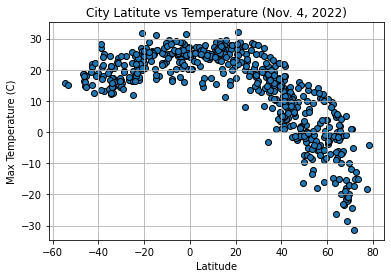

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitute vs Temperature (Nov. 4, 2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png", dpi=100)

# Show plot
plt.show()

#### Latitude Vs. Humidity

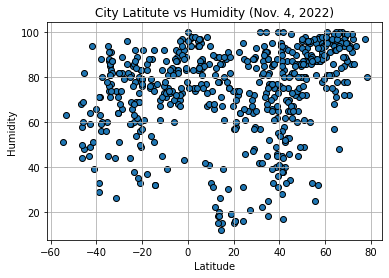

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitute vs Humidity (Nov. 4, 2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig2.png",dpi=100)

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

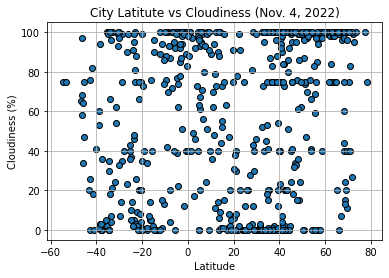

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitute vs Cloudiness (Nov. 4, 2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

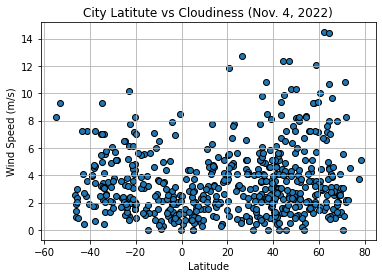

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitute vs Cloudiness (Nov. 4, 2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_regression(x_value, y_value, x_text=0, y_text=0):
    
    # Regression
    (slope,intercept,rvalue,pvalue,stderr) = linregress(x_value,y_value)
    regress_values = slope * x_value + intercept
    
    # Generate Text for Line Equation
    line_eq = "y =" + str(round(slope,2)) + "x" + str(round(intercept,2))
    
    #Draw Graphs/Text
    plt.scatter(x_value,y_value, edgecolor="black")
    plt.plot(x_value,regress_values, "r")
    plt.annotate(line_eq,xy=(x_text,y_text),fontsize=15,color="red")
    
    # Graph Text
    plt.xlabel(x_value.name)
    plt.ylabel(y_value.name)
    plt.grid()
    plt.show()
    print(f"The r-value is: {rvalue}")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,provideniya,64.3833,-173.3000,0.06,74,100,8.00,RU,1667862928
1,yumen,40.2833,97.2000,1.44,40,23,2.10,CN,1667862929
2,victoria,22.2855,114.1577,22.36,91,99,4.92,HK,1667862856
3,khatanga,71.9667,102.5000,-14.97,97,99,2.03,RU,1667862451
4,tasiilaq,65.6145,-37.6368,2.09,95,100,3.89,GL,1667862929


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,codrington,-38.2667,141.9667,20.95,71,3,4.50,AU,1667862930
6,castro,-24.7911,-50.0119,11.91,81,10,3.30,BR,1667862675
7,lebu,-37.6167,-73.6500,13.09,80,36,4.71,CL,1667862930
9,hithadhoo,-0.6000,73.0833,27.28,78,83,8.45,MV,1667862931
10,mataura,-46.1927,168.8643,18.60,44,68,1.88,NZ,1667862447


###  Temperature vs. Latitude Linear Regression Plot

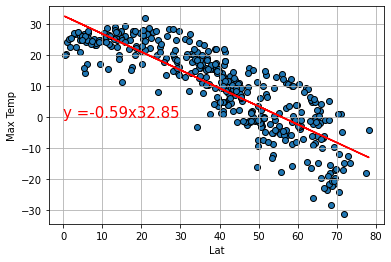

The r-value is: -0.8500745757316122


In [15]:
# Linear regression on Northern Hemisphere
plot_regression(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

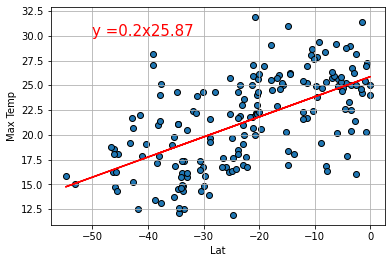

The r-value is: 0.5917380977074489


In [19]:
# Linear regression on Southern Hemisphere
plot_regression(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"], y_text=30, x_text = -50)

**Discussion about the linear relationship:** 

For the northern hemisphere there is a strong collelation between higher (more northern) lattitudes and lower temperatures. This is also true for sothern hemisphere cities (the more south from the equator the cooler temperatures tend to be), although the correlation is not as strong. 

### Humidity vs. Latitude Linear Regression Plot

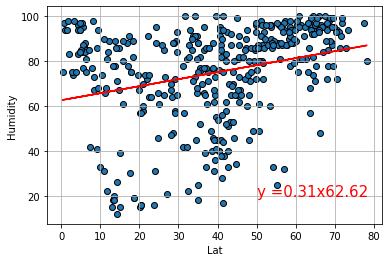

The r-value is: 0.2853039949108016


In [24]:
# Northern Hemisphere
plot_regression(northern_hemi_df["Lat"],northern_hemi_df["Humidity"], y_text=20, x_text = 50)

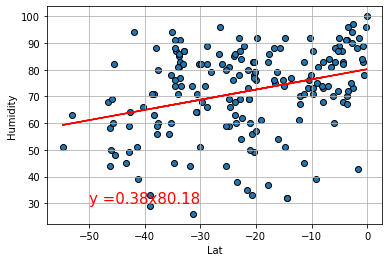

The r-value is: 0.3138401511917603


In [27]:
# Southern Hemisphere
plot_regression(southern_hemi_df["Lat"],southern_hemi_df["Humidity"], y_text=30, x_text = -50)

**Discussion about the linear relationship:** For both northern and southen hemisphere cities there is low correlation (.32, .27 respectively), between latitude and humidity. With that said, the trend appears to weakly indicate that areas closer to the equator do tend to be more humid. 

### Cloudiness vs. Latitude Linear Regression Plot

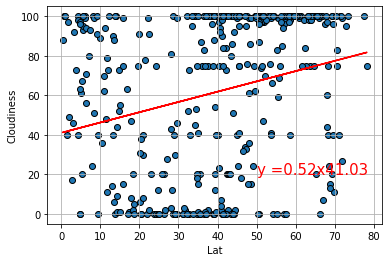

The r-value is: 0.2594173255519585


In [29]:
# Northern Hemisphere
plot_regression(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"], y_text=20, x_text = 50)

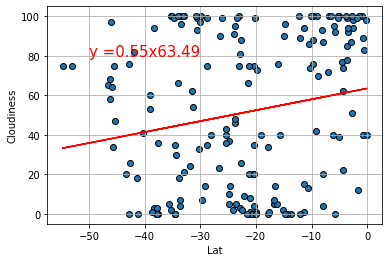

The r-value is: 0.19054387026714623


In [32]:
# Southern Hemisphere
plot_regression(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"], y_text=80, x_text = -50)

**Discussion about the linear relationship:** For both northern and southen hemisphere cities there is very low correlation (.14, .24 respectively), between latitude and cloudiness. With that said, the trend appears to weakly indicate that areas closer to the equator do tend to be more cloudy. This feels to be a reasonable result as it would also correlate with areas that have higher levels of humidity. 

### Wind Speed vs. Latitude Linear Regression Plot

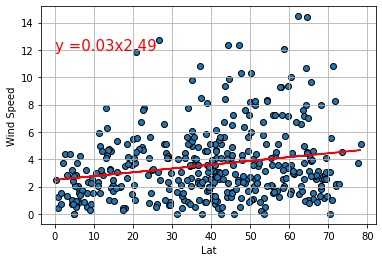

The r-value is: 0.20836936088457975


In [34]:
# Northern Hemisphere
plot_regression(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"], y_text=12, x_text = 0)

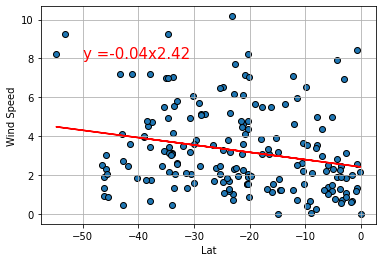

The r-value is: -0.23253843464288337


In [37]:
# Southern Hemisphere
plot_regression(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"], y_text=8, x_text = -50)

**Discussion about the linear relationship:** For northern hemisphere 